In [1]:
!pip install pyod

# Experimente zur Entwicklung eines Konzepts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.lof import LOF

import pyod_experiments as exp

%matplotlib inline

## Laden der Datensätze

In [3]:
owa = pd.read_csv("../data/owa_dataset.csv")
owa[["hits", "visitors", "mean"]] = owa[["hits", "visitors", "mean"]].astype(float)
syn1 = pd.read_csv("../data/syn_datasets/syn1_dataset.csv")
syn2 = pd.read_csv("../data/syn_datasets/syn2_dataset.csv")

datasets = {
  "OWA": owa, 
  "SYN-1": syn1,
  "SYN-2": syn2
}

## Wahl der Feature-Kombinationen

In [4]:
featureNames = ["h", "hv", "hm", "hvm"]
featureCombinations = [
  ["hits"], ["hits", "visitors"], ["hits", "mean"], ["hits", "visitors", "mean"]
]

### k-NN

||||



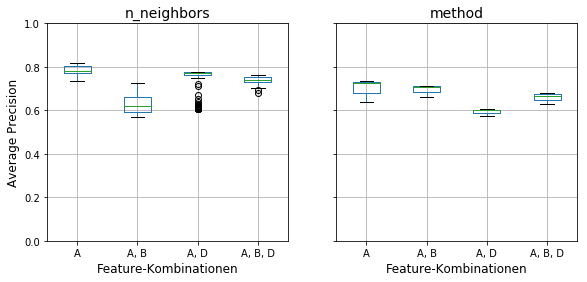

In [5]:
resKNN = pd.DataFrame()
resKNN2 = pd.DataFrame()

j = 0
for features in featureCombinations:
  print("|", end="")
  res = exp.runVariableConfiguration(owa, features, owa["anomalyClass"].tolist(), KNN, { "n_neighbors": 5 }, "n_neighbors", 5, 160 - 5, 160 - 10, "int")
  resKNN["owa_" + featureNames[j]] = res["avg_precision"]

  res2 = exp.runVariableCategoricalConfiguration(owa, features, owa["anomalyClass"].tolist(), KNN, { "method": "largest" }, "method", ["largest", "mean", "median"])
  resKNN2["owa_" + featureNames[j]] = res2["avg_precision"]
  j += 1
print("\n")

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches(9.5,4)

resKNN = resKNN.rename(columns={"owa_h" : "A", "owa_hv": "A, B", "owa_hm": "A, D", "owa_hvm": "A, B, D"})
ax = resKNN.boxplot(column=["A", "A, B", "A, D", "A, B, D"], ax=axes[0])
ax.set_title("n_neighbors", fontsize=14)
ax.set_xlabel("Feature-Kombinationen", fontsize=12)
ax.set_ylabel("Average Precision", fontsize=12)
ax.set_ylim((0, 1))

resKNN2 = resKNN2.rename(columns={"owa_h" : "A", "owa_hv": "A, B", "owa_hm": "A, D", "owa_hvm": "A, B, D"})
ax2 = resKNN2.boxplot(column=["A", "A, B", "A, D", "A, B, D"], ax=axes[1])
ax2.set_title("method", fontsize=14)
ax2.set_xlabel("Feature-Kombinationen", fontsize=12)
ax2.set_ylim((0, 1))
plt.show()

### LOF

||||



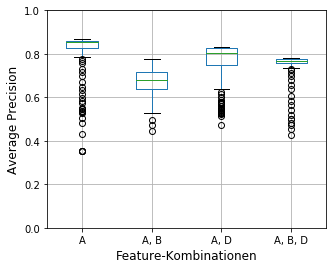

In [6]:
resLOF = pd.DataFrame()

j = 0
for features in featureCombinations:
  print("|", end="")
  res = exp.runVariableConfiguration(owa, features, owa["anomalyClass"].tolist(), LOF, { "n_neighbors": 5 }, "n_neighbors", 10, 160, 160 - 10, "int")
  resLOF["owa_" + featureNames[j]] = res["avg_precision"]
  j += 1
print("\n")

resLOF = resLOF.rename(columns={"owa_h" : "A", "owa_hv": "A, B", "owa_hm": "A, D", "owa_hvm": "A, B, D"})
ax = resLOF.boxplot(column=["A", "A, B", "A, D", "A, B, D"], figsize=(5, 4))
ax.set_xlabel("Feature-Kombinationen", fontsize=12)
ax.set_ylabel("Average Precision", fontsize=12)
ax.set_ylim((0, 1))
plt.show()

### HBOS

||||



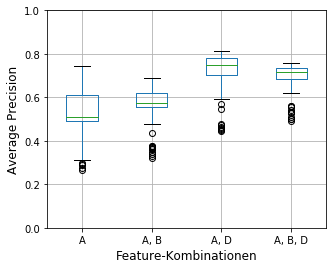

In [7]:
resHBOS = pd.DataFrame()

j = 0
for features in featureCombinations:
  print("|", end="")
  res = exp.runVariableConfiguration(owa, features, owa["anomalyClass"].tolist(), HBOS, { "n_bins": 10 }, "n_bins", 10, 160, 160 - 10, "int")
  resHBOS["owa_" + featureNames[j]] = res["avg_precision"]
  j += 1
print("\n")

resHBOS = resHBOS.rename(columns={"owa_h" : "A", "owa_hv": "A, B", "owa_hm": "A, D", "owa_hvm": "A, B, D"})
ax = resHBOS.boxplot(column=["A", "A, B", "A, D", "A, B, D"], figsize=(5, 4))
ax.set_xlabel("Feature-Kombinationen", fontsize=12)
ax.set_ylabel("Average Precision", fontsize=12)
ax.set_ylim((0, 1))
plt.show()

## Konfiguration der Eingabeparameter

### k-NN

|||

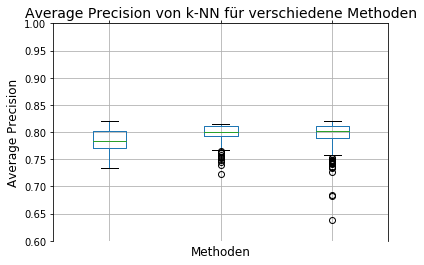

In [8]:
resKNN3 = pd.DataFrame()

methods = ["largest", "mean", "median"]

for method in methods:
  print("|", end="")
  resX = exp.runVariableConfiguration(owa, ["hits"], owa["anomalyClass"].tolist(), KNN, { "n_neighbors": 5, "method": method }, "n_neighbors", 5, 160 - 5, 160 - 10, "int")
  resKNN3[method] = resX["avg_precision"]

ax = resKNN3.boxplot(column=["largest", "mean", "median"], figsize=(6, 4))
ax.set_title("Average Precision von k-NN für verschiedene Methoden", fontsize=14)
ax.set_xlabel("Methoden", fontsize=12)
ax.set_ylabel("Average Precision", fontsize=12)

ax.set_ylim(0.6, 1.0) 
ax.xaxis.tick_top()
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)

plt.show()

### Maximale Average Precision

In [9]:
print("Maximum k-NN:", round(resKNN3["median"].max(), 4), "at n_neighbors =", resKNN3["median"].idxmax())
print("Maximum LOF: ", round(resLOF["A"].max(), 4), "at n_neighbors =", resLOF["A"].idxmax())
print("Maximum HBOS:", round(resHBOS["A, D"].max(), 4), " at n_bins =", resHBOS["A, D"].idxmax())

Maximum k-NN: 0.8196 at n_neighbors = 75
Maximum LOF:  0.8685 at n_neighbors = 75
Maximum HBOS: 0.815  at n_bins = 142


## Wahl des Algorithmus

### Robustheit über lokalen Wertebereich (OWA-Datensatz)

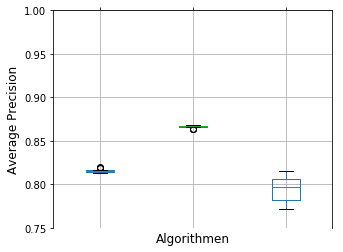

In [10]:
res = pd.DataFrame()

tmp = exp.runVariableConfiguration(owa, ["hits"], owa["anomalyClass"].tolist(), KNN, { "n_neighbors": 75, "method": "median" }, "n_neighbors", 75-10, 75+10, 21, "int")["avg_precision"]
tmp.index = range(-10, 11)
res["k-NN"] = tmp
tmp = exp.runVariableConfiguration(owa, ["hits"], owa["anomalyClass"].tolist(), LOF, { "n_neighbors": 75 }, "n_neighbors", 75-10, 75+10, 21, "int")["avg_precision"]
tmp.index = range(-10, 11)
res["LOF"] = tmp
tmp = exp.runVariableConfiguration(owa, ["hits", "mean"], owa["anomalyClass"].tolist(), HBOS, { "n_bins": 142 }, "n_bins", 142-10, 142+10, 21, "int")["avg_precision"]
tmp.index = range(-10, 11)
res["HBOS"] = tmp

ax = res.boxplot(column=["k-NN", "LOF", "HBOS"], figsize=(5, 4))
ax.set_xlabel("Algorithmen", fontsize=12)
ax.set_ylabel("Average Precision", fontsize=12)
ax.set_ylim(0.75, 1.0)
ax.xaxis.tick_top()
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)
plt.show()

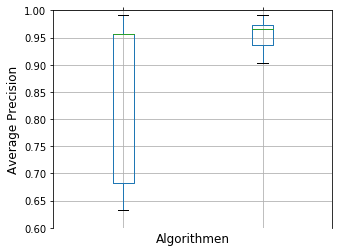

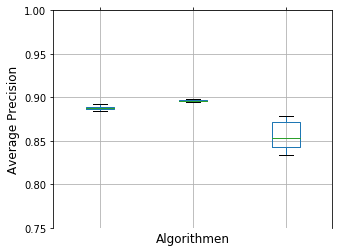

In [11]:
res = pd.DataFrame()
tmp = exp.runVariableConfiguration(syn1, ["hits"], syn1["anomalyClass"].tolist(), LOF, { "n_neighbors": 75 }, "n_neighbors", 75-10, 75+10, 21, "int")["avg_precision"]
tmp.index = range(-10, 11)
res["LOF"] = tmp
tmp = exp.runVariableConfiguration(syn1, ["hits", "mean"], syn1["anomalyClass"].tolist(), HBOS, { "n_bins": 142 }, "n_bins", 142-10, 142+10, 21, "int")["avg_precision"]
tmp.index = range(-10, 11)
res["HBOS"] = tmp

res2 = pd.DataFrame()
tmp = exp.runVariableConfiguration(syn2, ["hits"], syn2["anomalyClass"].tolist(), KNN, { "n_neighbors": 75, "method": "median" }, "n_neighbors", 75-10, 75+10, 21, "int")["avg_precision"]
tmp.index = range(-10, 11)
res2["k-NN"] = tmp
tmp = exp.runVariableConfiguration(syn2, ["hits"], syn2["anomalyClass"].tolist(), LOF, { "n_neighbors": 75 }, "n_neighbors", 75-10, 75+10, 21, "int")["avg_precision"]
tmp.index = range(-10, 11)
res2["LOF"] = tmp
tmp = exp.runVariableConfiguration(syn2, ["hits", "mean"], syn2["anomalyClass"].tolist(), HBOS, { "n_bins": 142 }, "n_bins", 142-10, 142+10, 21, "int")["avg_precision"]
tmp.index = range(-10, 11)
res2["HBOS"] = tmp

ax = res.boxplot(column=["LOF", "HBOS"], figsize=(5, 4))
ax.set_xlabel("Algorithmen", fontsize=12)
ax.set_ylabel("Average Precision", fontsize=12)
ax.set_ylim(0.6, 1.0)
ax.xaxis.tick_top()
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)
plt.show()

ax = res2.boxplot(column=["k-NN", "LOF", "HBOS"], figsize=(5, 4))
ax.set_xlabel("Algorithmen", fontsize=12)
ax.set_ylabel("Average Precision", fontsize=12)
ax.set_ylim(0.75, 1.0)
ax.xaxis.tick_top()
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)
plt.show()

### Verteilung der Genauigkeit von LOF auf dem SYN-1-Datensatz

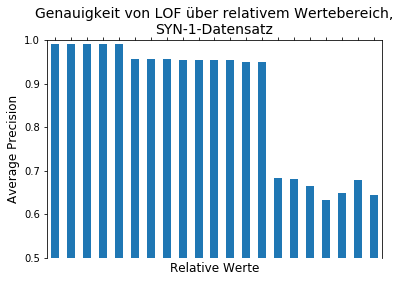

In [12]:
ax = res["LOF"].plot.bar(figsize=(6,4), color="#1f77b4")
ax.set_title("Genauigkeit von LOF über relativem Wertebereich,\nSYN-1-Datensatz", fontsize=14)
ax.set_xlabel("Relative Werte", fontsize=12)
ax.set_ylabel("Average Precision", fontsize=12)
ax.set_ylim(0.5, 1.0)
ax.xaxis.tick_top()
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)
plt.show()